# Title of Project

## Mileage Prediction - Regression Analysis |

# Objective

The primary objective of this project is to develop a predictive model that estimates a car's fuel efficiency, measured in miles per gallon (mpg), based on its various features. By understanding the relationship between these features and fuel efficiency, the model can help manufacturers and consumers make informed decisions about vehicle design and selection.

# Attribute Information

1.  mpg:Continuous
2.  cylinders:Multivalued Discrete
3.  displacement:Continuous
4.  horsepower:Continuous
5.  weight:Continuous
6.  acceleration:Continuous
7.  model year:Multivalued Discrete
8.  origin:Multivalued Discrete
9.  car name:String (Unique for each instance)

# IMPORTING LIBRARIES  

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Importing Dataframe

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/YBIFoundation/Dataset/main/MPG.csv')

In [3]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


# Describing Data

In [4]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [6]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

Shape of dataframe

In [7]:
df.shape

(398, 9)

Values/Labels in Y Variable

In [8]:
df.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       93
weight          351
acceleration     95
model_year       13
origin            3
name            305
dtype: int64

# Data Preprocessing

Removing missing values

In [9]:
df=df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


# Data Visualization

C:\Users\SAMMY\AppData\Local\Temp\ipykernel_15664\1565423729.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


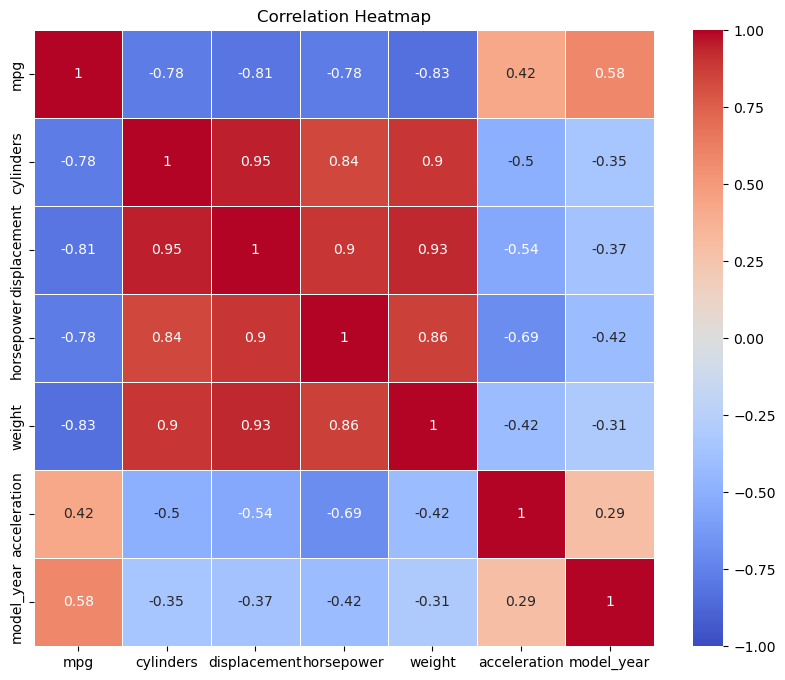

In [10]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [11]:
df.corr()

C:\Users\SAMMY\AppData\Local\Temp\ipykernel_15664\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316
model_year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000


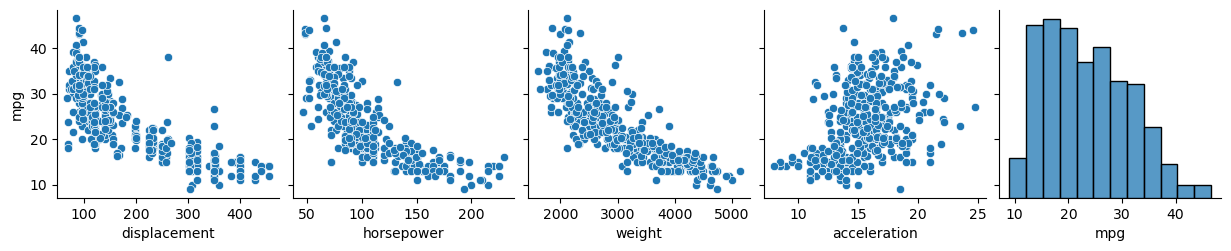

In [12]:
sns.pairplot(df ,x_vars=['displacement', 'horsepower', 'weight', 'acceleration', 'mpg'],y_vars=['mpg']);

<Axes: xlabel='displacement', ylabel='mpg'>

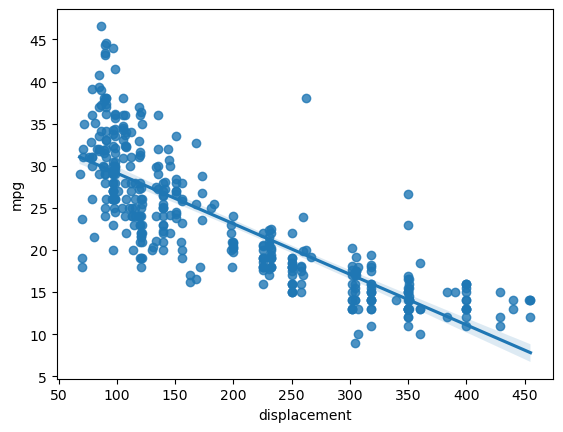

In [13]:
sns.regplot(x='displacement' , y='mpg' , data=df)

# Define Target Variable (y) and Feature Variables (X)

In [14]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [15]:
y = df['mpg']

In [16]:
y.shape

(392,)

In [17]:
x = df[['displacement','horsepower','weight','acceleration']]

In [18]:
x.shape

(392, 4)

In [19]:
x

,displacement,horsepower,weight,acceleration
0,307.0,130.0,3504,12.0
1,350.0,165.0,3693,11.5
2,318.0,150.0,3436,11.0
3,304.0,150.0,3433,12.0
4,302.0,140.0,3449,10.5
...,...,...,...,...
393,140.0,86.0,2790,15.6
394,97.0,52.0,2130,24.6
395,135.0,84.0,2295,11.6
396,120.0,79.0,2625,18.6


# Scaling Data

In [20]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [21]:
x=ss.fit_transform(x)
x

array([[ 1.07728956,  0.66413273,  0.62054034, -1.285258  ],
       [ 1.48873169,  1.57459447,  0.84333403, -1.46672362],
       [ 1.1825422 ,  1.18439658,  0.54038176, -1.64818924],
       ...,
       [-0.56847897, -0.53247413, -0.80463202, -1.4304305 ],
       [-0.7120053 , -0.66254009, -0.41562716,  1.11008813],
       [-0.72157372, -0.58450051, -0.30364091,  1.40043312]])

AFTER STANDARDISATION MEAN WILL BE 0 AND SD WILL BE 1 

In [22]:
pd.DataFrame(x).describe()

,0,1,2,3
count,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02
mean,-7.250436e-17,-1.812609e-16,-1.812609e-17,4.350262e-16
std,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00
min,-1.209563e+00,-1.520975e+00,-1.608575e+00,-2.736983e+00
25%,-8.555316e-01,-7.665929e-01,-8.868535e-01,-6.410551e-01
50%,-4.153842e-01,-2.853488e-01,-2.052109e-01,-1.499869e-02
75%,7.782764e-01,5.600800e-01,7.510927e-01,5.384714e-01
max,2.493416e+00,3.265452e+00,2.549061e+00,3.360262e+00


# Train Test Split

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7,random_state=2529)

In [24]:
x_train.shape , x_test.shape , y_train.shape , y_test.shape 

((274, 4), (118, 4), (274,), (118,))

# Linear Regression Model

In [25]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [26]:
lr.fit(x_train,y_train)

LinearRegression()

In [27]:
lr.intercept_

23.485738559737584

In [28]:
lr.coef_

array([-1.05767743, -1.68734727, -4.10787617, -0.11495177])

mielage = 23.4 - 1.05 (Displacement) - 1.68 (HorsePower) - 4.1 (Weight) - 0.11 (Acceleration) + error 

# Prediction

In [29]:
y_pred=lr.predict(x_test)
y_pred

array([18.51865637, 15.09305675, 14.30128789, 23.6753321 , 29.7546115 ,
       23.68796629, 26.61066644, 24.56692437, 15.06260986, 11.94312046,
       24.08050053, 27.96518468, 31.66130278, 31.01309132, 18.32428976,
       19.32795009, 28.08847536, 32.1506879 , 31.15859692, 27.15792144,
       18.82433097, 22.54580176, 26.15598115, 32.36393869, 20.74377679,
        8.78027518, 22.19699435, 18.20614294, 25.00052718, 15.26421552,
       23.13441082, 17.10542257,  9.87180062, 30.00790415, 20.41204655,
       29.11860245, 24.4305187 , 21.72601835, 10.51174626, 13.12426391,
       21.41938406, 19.96113872,  6.19146626, 17.79025345, 22.5493033 ,
       29.34765021, 13.4861847 , 25.88852083, 29.40406946, 22.41841964,
       22.07684766, 16.46575802, 24.06290693, 30.12890046, 10.11318121,
        9.85011438, 28.07543852, 23.41426617, 20.08501128, 30.68234133,
       20.92026393, 26.78370281, 22.9078744 , 14.15936872, 24.6439883 ,
       26.95515832, 15.25709393, 24.11272087, 30.80980589, 14.97

In [30]:
y_pred.shape

(118,)

# Model Accuracy

In [31]:
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , r2_score
mean_absolute_error(y_test,y_pred)

3.32869686432441

In [32]:
mean_absolute_percentage_error(y_test,y_pred)

0.14713035779536746

In [33]:
r2_score(y_test,y_pred)

0.7031250746717692

# Polynomial Regression 

In [34]:
from sklearn.preprocessing import PolynomialFeatures
p=PolynomialFeatures(degree=2 , interaction_only=True , include_bias=False)
x_train2=p.fit_transform(x_train)
x_train2

array([[ 1.58441591e+00,  2.87525410e+00,  1.93019004e+00, ...,
         5.54978683e+00, -1.60840431e+00, -1.07973970e+00],
       [-1.04690006e+00, -8.96658822e-01, -1.16416681e+00, ...,
         1.04386044e+00, -4.74689531e-01, -6.16307770e-01],
       [ 5.31889522e-01, -6.88553281e-01,  7.03056522e-01, ...,
        -4.84091875e-01, -1.36410880e+00,  1.39284151e+00],
       ...,
       [-5.78047393e-01, -3.76394970e-01, -3.14250132e-01, ...,
         1.18282169e-01,  5.64543099e-03,  4.71333990e-03],
       [-1.10431059e+00, -8.96658822e-01, -1.06514740e+00, ...,
         9.55073808e-01, -1.28825326e+00, -1.53032521e+00],
       [-7.21573718e-01, -1.16263044e-01, -4.27415183e-01, ...,
         4.96925903e-02,  3.12806362e-02,  1.14996291e-01]])

In [35]:
x_test2=p.fit_transform(x_test)
x_test2

array([[ 1.05815271,  1.05433062,  0.52741493, ...,  0.55606971,
        -0.89590745, -0.44816584],
       [ 1.49830011,  0.97629104,  1.26888178, ...,  1.23879791,
        -0.4398349 , -0.57165175],
       [ 1.49830011,  1.26243616,  1.35729197, ...,  1.71349447,
        -1.16437867, -1.25186672],
       ...,
       [-0.932079  , -0.76659286, -0.8399961 , ...,  0.64393501,
        -0.73969744, -0.81052537],
       [-0.30056316,  0.74217231,  0.50973289, ...,  0.37830964,
         0.06967564,  0.04785407],
       [-0.77898425, -0.24632901, -0.82467166, ...,  0.20314055,
         0.00369461,  0.01236899]])

In [36]:
lr.fit(x_train2,y_train)

LinearRegression()

In [37]:
lr.intercept_

21.273364500637655

In [38]:
lr.coef_

array([-2.76070596, -5.00559628, -1.36884133, -0.81225214,  1.24596571,
       -0.12475017, -0.90542822,  1.35064048, -0.17337823,  1.41680398])

In [39]:
y_pred_p = lr.predict(x_test2)
y_pred_p

array([15.44878868, 14.01519536, 13.80583049, 25.95331799, 30.89924906,
       22.68488043, 24.74986967, 22.70743639, 14.37437345, 13.20490013,
       27.50040536, 28.43976461, 34.62817954, 33.26541987, 18.4667298 ,
       17.7545968 , 27.48524651, 34.5949536 , 33.48125052, 26.8014229 ,
       16.8057769 , 21.05722575, 24.33817201, 34.77761918, 18.98156855,
       15.20071246, 19.36768258, 16.0502785 , 25.74107867, 15.66552393,
       21.08509734, 15.16602732, 14.01691976, 31.56705822, 19.0231858 ,
       30.25473337, 22.19778766, 20.91437064, 12.9555207 , 13.42118647,
       19.66061238, 17.40641384, 14.90285207, 15.96735977, 21.10552747,
       30.75019604, 13.161465  , 25.17529995, 27.9098963 , 19.87456409,
       20.90558547, 14.09427836, 23.12005126, 31.84964053, 12.83943937,
       13.95266816, 27.68977441, 20.86050123, 17.53324298, 32.71815198,
       19.6516835 , 25.44223418, 21.64139279, 13.69496796, 21.76730595,
       25.45896136, 14.12565313, 22.87127819, 31.89812676, 14.07

# Model Accuracy

In [40]:
mean_absolute_error(y_test,y_pred_p)

2.7887147720295973

In [41]:
mean_absolute_percentage_error(y_test,y_pred_p)

0.12074018342938685

In [42]:
r2_score(y_test,y_pred_p)

0.7461731314563803

# Explanation

In this project, we developed a linear regression model to predict the fuel efficiency of cars, measured in miles per gallon (mpg). We used a dataset containing various car features, such as displacement, horsepower, weight, and acceleration, as input variables.

